In [1]:
#pip install tensorflow

# Deep Neural Networks Classification

Bu projede, derin öğrenme modelleri (Artificial Neural Networks) kullanılarak hem sınıflandırma hem de regresyon problemleri çözülmüştür.

İlk kısımda, Pima Indians Diabetes veri seti ile diyabet var/yok sınıflandırması yapılmıştır.

İkinci kısımda ise konut fiyat tahmini için kc_house.pkl veri seti kullanılarak bir regresyon modeli eğitilmiştir.

Projede ayrıca modelin eğitim süresi ölçülmüş, doğruluk görselleştirilmiş ve model yapıları özetlenmiştir.



In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('pima-indians-diabetes.csv')
#veri setimizin içerisinde pima denilen bi kızılderili kadın grubu var
#hamilelik döneminde bir geçici şeker hastalığı var outcome 1 ise var 0 ise yok demek 

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
import tensorflow as tf

<img src="tensor.jpeg"/>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
x=df.drop('Outcome',axis=1)
y=df[['Outcome']]

In [9]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [11]:
model = Sequential()  # Sıralı model başlatılıyor

model.add(Dense(8, activation='relu'))  # 8 nöronlu gizli katman, ReLU aktivasyonu kullanıyor
model.add(Dense(120, activation='relu'))  # 120 nöronlu gizli katman, ReLU aktivasyonu kullanıyor
model.add(Dense(64, activation='relu'))  # 64 nöronlu gizli katman, ReLU aktivasyonu kullanıyor
model.add(Dense(6, activation='relu'))  # 6 nöronlu gizli katman, ReLU aktivasyonu kullanıyor
model.add(Dense(2, activation='relu'))  # 2 nöronlu gizli katman, ReLU aktivasyonu kullanıyor
model.add(Dense(1, activation='sigmoid'))  # 1 nöronlu çıkış katmanı, Sigmoid aktivasyon (binary classification için)
#artıcak azalıcak en son 1 olucak
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Model derleniyor: binary çapraz entropi kaybı ve adam optimizer ile


In [12]:
from sklearn.preprocessing import normalize ,scale

In [13]:
x=scale(x)

In [14]:
import time

start_time = time.time()  # Başlangıç zamanı

model.fit(x, y, epochs=250, batch_size=32, validation_split=0.20, verbose=1)

end_time = time.time()  # Bitiş zamanı
print("Model eğitimi süresi (saniye):", end_time - start_time)


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6619 - loss: 0.6636 - val_accuracy: 0.6494 - val_loss: 0.6118
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6640 - loss: 0.5949 - val_accuracy: 0.7208 - val_loss: 0.5658
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7181 - loss: 0.5383 - val_accuracy: 0.7143 - val_loss: 0.5502
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7302 - loss: 0.5221 - val_accuracy: 0.7208 - val_loss: 0.5371
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7781 - loss: 0.5035 - val_accuracy: 0.7273 - val_loss: 0.5378
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7478 - loss: 0.5042 - val_accuracy: 0.7208 - val_loss: 0.5378
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7616 - loss: 0.4843 - val_accuracy: 0.7273 - val_loss: 0.5368
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7959 - loss: 0.4540 - val_accuracy: 0.7208 - 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,911 (109.03 KB)

 Trainable params: 9,303 (36.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,608 (72.69 KB)

In [16]:
history=model.fit(x, y, epochs=100, batch_size=32, validation_split=0.20, verbose=1) 

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9814 - loss: 0.0442 - val_accuracy: 0.6818 - val_loss: 1.7511
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9570 - loss: 0.0901 - val_accuracy: 0.6948 - val_loss: 1.7817
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9765 - loss: 0.0828 - val_accuracy: 0.7468 - val_loss: 1.9930
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9726 - loss: 0.0765 - val_accuracy: 0.7273 - val_loss: 1.8537
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9520 - loss: 0.1540 - val_accuracy: 0.7468 - val_loss: 1.8499
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9776 - loss: 0.0631 - val_accuracy: 0.7273 - val_loss: 1.8169
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9909 - loss: 0.0480 - val_accuracy: 0.7208 - val_loss: 1.9800
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9659 - loss: 0.0723 - val_accuracy: 0.7208 - v

In [17]:
import matplotlib.pyplot as plt

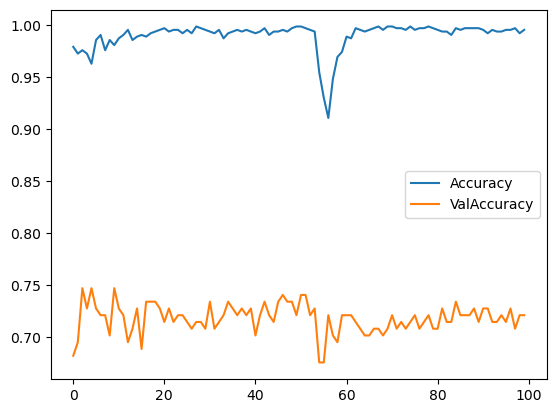

In [18]:
plt.plot(history.history['accuracy'], label='Accuracy')  # Eğitim doğruluk değerlerini çizdiriyoruz
plt.plot(history.history['val_accuracy'], label='ValAccuracy')  # Doğrulama (validation) doğruluk değerlerini çizdiriyoruz
plt.legend()

### SNN - Regression

In [19]:
import pandas as pd

In [20]:
df=pd.read_pickle('kc_house.pkl')

In [21]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
x=df.drop('price',axis=1)
y=df[['price']]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20,random_state=42)

In [25]:
model = Sequential()  # Sıralı model başlatılıyor

model.add(Dense(120, activation='relu'))  # 120 nöronlu gizli katman, ReLU aktivasyonu kullanılıyor
model.add(Dense(80, activation='relu'))  # 80 nöronlu gizli katman, ReLU aktivasyonu kullanılıyor
model.add(Dense(64, activation='relu'))  # 64 nöronlu gizli katman, ReLU aktivasyonu kullanılıyor
model.add(Dense(30, activation='relu'))  # 30 nöronlu gizli katman, ReLU aktivasyonu kullanılıyor
model.add(Dense(20, activation='relu'))  # 20 nöronlu gizli katman, ReLU aktivasyonu kullanılıyor
model.add(Dense(4, activation='relu'))  # 4 nöronlu gizli katman, ReLU aktivasyonu kullanılıyor
model.add(Dense(1))  # 1 nöronlu çıkış katmanı, aktivasyon yok (doğrudan değer çıkışı yapacak)

model.compile(loss='mse', optimizer='adam')  # Model derleniyor: Kayıp fonksiyonu MSE (ortalama karesel hata), optimizer Adam


In [26]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=1500) 
# x_train, y_train: eğitim için kullanılacak veriler 
# validation_data=(x_test, y_test): eğitim sırasında doğrulama için kullanılacak test verileri  
# batch_size=128: her adımda 128 örnekle eğitim yapılacak  
# epochs=300: tüm eğitim verisi 1500 kez modele gösterilecek (1500 tur eğitim yapılacak)


Epoch 1/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 229807505408.0000 - val_loss: 33018859520.0000
Epoch 2/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32579614720.0000 - val_loss: 31854106624.0000
Epoch 3/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31614193664.0000 - val_loss: 31102951424.0000
Epoch 4/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30538874880.0000 - val_loss: 30094659584.0000
Epoch 5/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30312083456.0000 - val_loss: 29604642816.0000
Epoch 6/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28921667584.0000 - val_loss: 29432211456.0000
Epoch 7/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28274724864.0000 - val_loss: 28978778112.0000
Epoch 8/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28959576064.0000 - val_loss: 28774629376.0000
Epoch 9/1500
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28073031680.0000 - val_loss: 28637663232.0000
Epoch 10/1500
119/119 ━━━━━

In [27]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
from sklearn.metrics import r2_score,mean_squared_error

In [29]:
r2_score(y_test,tahmin)


0.8446031808853149

In [30]:
mean_squared_error(y_test,tahmin)**.5

89190.08623578172

In [31]:
loss_f=pd.DataFrame(history.history)

<Axes: >

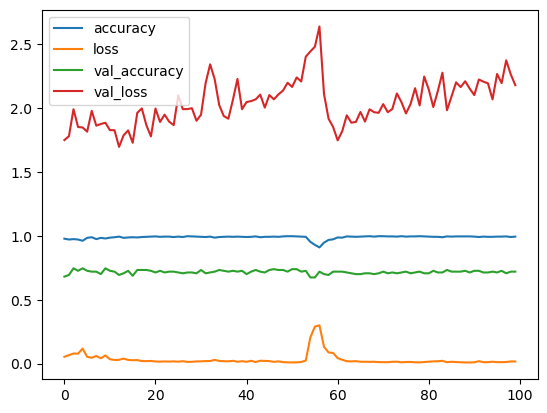

In [33]:
loss_f.plot()

Projede hem sınıflandırma hem de regresyon uygulanmış olması çok yönlü bir çalışma ortaya koymuş.

Katman sayısı fazla ama mantıklı bir şekilde azalan yapıda kurulmuş (120→80→64...).

Eğitim süresi ölçülmüş olması güzel bir dokunuş olmuş, performans analizi yapılabilir.

Görselleştirme ile eğitim süreci daha anlaşılır hale getirilmiş.

scale() kullanımı çok yerinde çünkü sinir ağlarında veri ölçeklendirme olmazsa öğrenme bozulur.

Bir öneri: Regresyon kısmında RMSE veya MAE gibi ekstra metriklerle hata daha anlamlı yorumlanabilir.

Kodların her adımı açıklanmış, okunabilirliği yüksek. Projeyi büyütmek isteyen biri için güzel temel.